Logging Setup!


INFO:calendar_ipynb.google_oauth:Verifying credentials for fahimalizain@gmail.com
INFO:calendar_ipynb.google_oauth:✅ Credentials found for fahimalizain@gmail.com
INFO:calendar_ipynb.google_oauth:Verifying credentials for fahim.zain@kwalee.com
INFO:calendar_ipynb.google_oauth:✅ Credentials found for fahim.zain@kwalee.com
INFO:googleapiclient.discovery_cache:file_cache is only supported with oauth2client<4.0.0
INFO:googleapiclient.discovery_cache:file_cache is only supported with oauth2client<4.0.0


INFO:googleapiclient.discovery_cache:file_cache is only supported with oauth2client<4.0.0
INFO:googleapiclient.discovery_cache:file_cache is only supported with oauth2client<4.0.0


Date Range: 2025-04-10 00:00:00+05:30  TO  2025-05-10 23:59:59+05:30 in Timezone: Asia/Kolkata


INFO:googleapiclient.discovery_cache:file_cache is only supported with oauth2client<4.0.0
INFO:googleapiclient.discovery_cache:file_cache is only supported with oauth2client<4.0.0
INFO:googleapiclient.discovery_cache:file_cache is only supported with oauth2client<4.0.0
INFO:googleapiclient.discovery_cache:file_cache is only supported with oauth2client<4.0.0
INFO:googleapiclient.discovery_cache:file_cache is only supported with oauth2client<4.0.0
INFO:calendar_ipynb.events_incremental:Sync completed for fahimalizain@gmail.com/mbn0dk4phhhufr6hpbrl15p4h0@group.calendar.google.com: Added 0, Updated 0, Deleted 0
INFO:calendar_ipynb.events_incremental:Sync completed for fahimalizain@gmail.com/j9d5885raedlop9apnj5c4odoo@group.calendar.google.com: Added 0, Updated 0, Deleted 0
INFO:calendar_ipynb.events_incremental:Sync completed for fahimalizain@gmail.com/fahimalizain@gmail.com: Added 0, Updated 0, Deleted 0
INFO:calendar_ipynb.events_incremental:Sync completed for fahimalizain@gmail.com/esva

Total Events Fetched: 1555


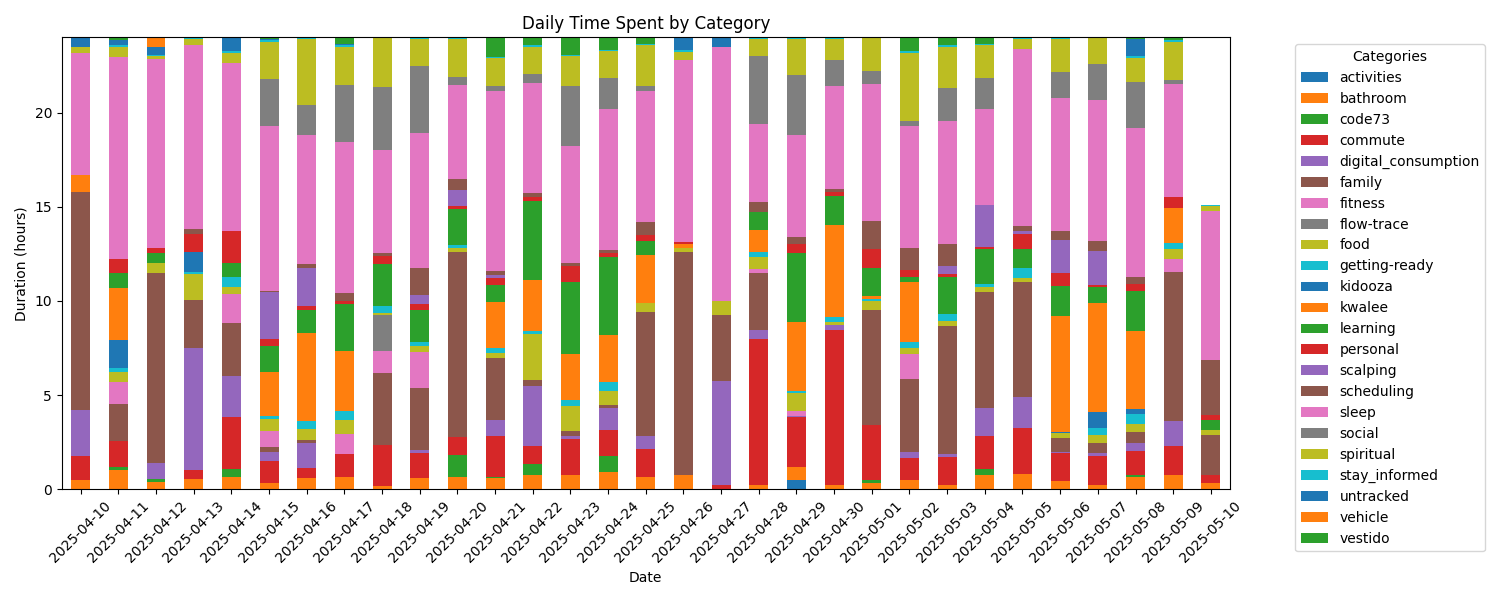

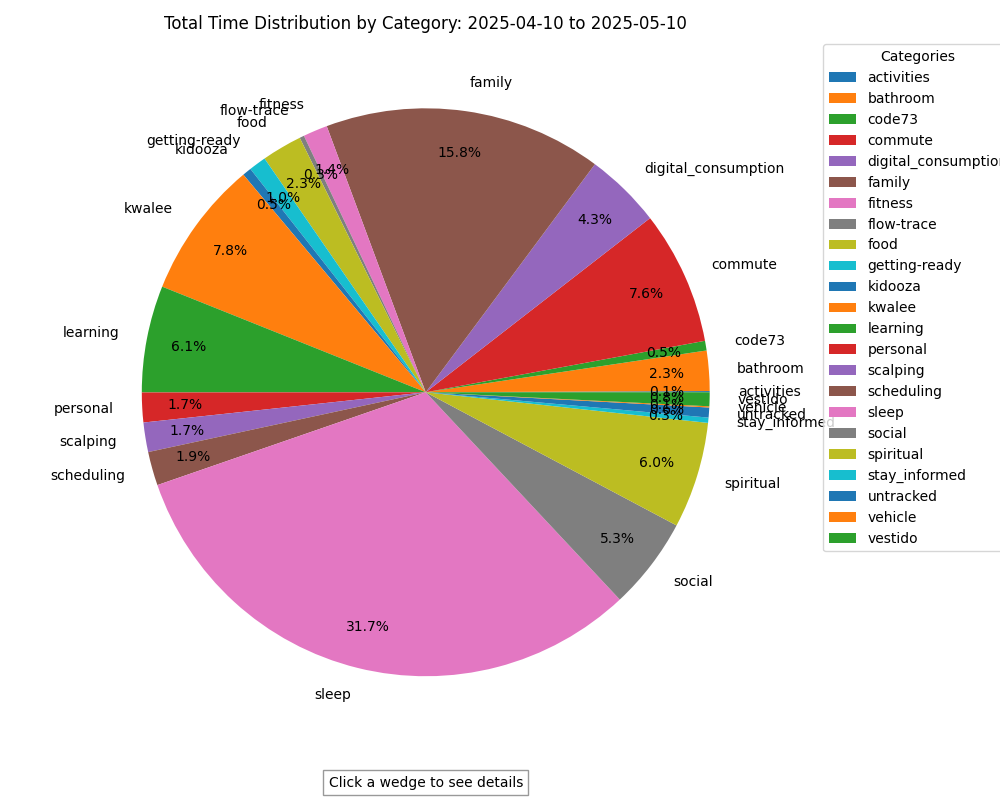

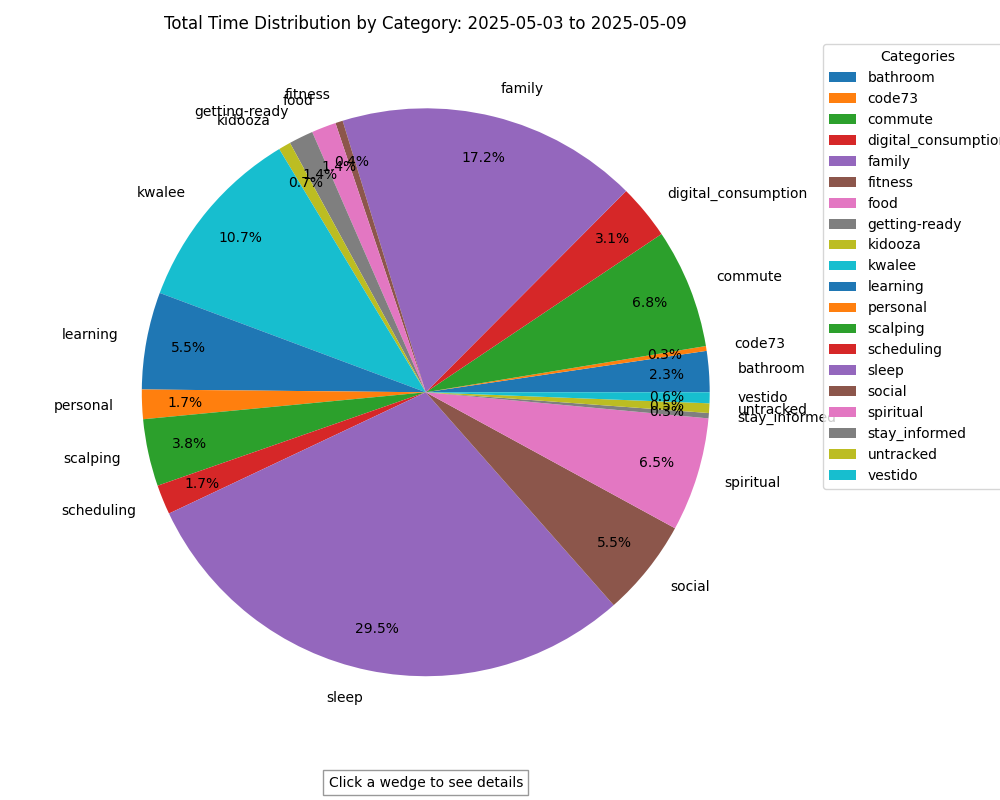

Events on 2025-05-03
  00:00 - 05:00 / 5h / 260.0  |  Sleeping
  02:55 - 03:15 / 20m / 10.0  |  Aali | Family
  03:15 - 03:25 / 10m / 5.0  |  Bathroom
  03:25 - 04:15 / 50m / 25.0  |  Aali | Family
  05:00 - 05:15 / 15m / 15.0  |  Woke Up
  05:15 - 05:30 / 15m / 15.0  |  Prayer: Subah
  05:30 - 05:50 / 20m / 20.0  |  Kizhisseri to Kondotty Drop Aali | Commute
  05:50 - 06:10 / 20m / 20.0  |  Kondotty to Club Riveka Kuniyil | Commute
  06:10 - 10:00 / 3h 50m / 200.0  |  Club Riveka Kuniyil | Family
  07:15 - 08:00 / 45m / 22.5  |  Uppa Sugar Drop | Family
  08:45 - 09:00 / 15m / 7.5  |  Farzi Overboard | Family
  10:00 - 10:40 / 40m / 40.0  |  Porotta from Nellikkunnath House | Family
  10:40 - 11:05 / 25m / 25.0  |  FAAZ Kitchen | Family
  11:05 - 11:30 / 25m / 12.5  |  Sleeping
  11:05 - 11:30 / 25m / 12.5  |  FSK | Family
  11:30 - 11:35 / 5m / 5.0  |  ReSchedule | Scheduling
  11:35 - 11:45 / 10m / 10.0  |  Bathroom
  11:45 - 11:55 / 10m / 10.0  |  Get Ready for Office
  11:55 - 12:

In [1]:
# Run the main notebook. Output is collapsed by default.
events = []
%run main.ipynb

In [3]:
# This cell is to debug the sleep calculation logic
import datetime
from calendar_ipynb.events import pretty_print_timedelta


def get_events_for_date(date_str: str):
    global events
    _date = datetime.datetime.fromisoformat(f"{date_str}T00:00:00+05:30")
    filtered_events = [
        event for event in events
        if datetime.datetime.fromisoformat(event["start"]["dateTime"]) >= _date
        and datetime.datetime.fromisoformat(event["start"]["dateTime"]).date() <= _date.date()
    ]
    
    return filtered_events

def pretty_print_events(title: str, events: list):
    print(title)
    for event in events:
        time_str = ""
        start_datetime = datetime.datetime.fromisoformat(event["start"]["dateTime"])
        end_datetime = datetime.datetime.fromisoformat(event["end"]["dateTime"])

        time_str += f"{start_datetime.strftime('%H:%M')} - {end_datetime.strftime('%H:%M')}"
        time_str += f" / {pretty_print_timedelta(end_datetime - start_datetime)} / {event['duration_min']}"   # {end_datetime.date().strftime('%d %b')}

        print(" ", time_str, " | ", event['summary'])

def summarize_sleep(date_str: str):
    global events
    filtered_events = get_events_for_date(date_str)

    if not len(filtered_events):
        print("No events found for this date")
        return

    sleep_events = [
        event for event in filtered_events
        if any(x[0] == "sleep" for x in event["categories"])
    ]

    pretty_print_events(f"Sleep Events on {date_str}", sleep_events)

    sleep_total_min = sum(x["duration_min"] for x in sleep_events)
    tdelta = datetime.timedelta(minutes=sleep_total_min)
    print("Total Sleep:", pretty_print_timedelta(tdelta), "\n\n")

# for i in range(6, -1, -1):   
#     dt = (datetime.datetime.now() + datetime.timedelta(days=-1 * i)).date().isoformat()
#     pretty_print_events("Events on " + dt, get_events_for_date(dt)) 
# summarize_sleep(date_str="2025-03-19")
dt = "2025-05-03"
pretty_print_events("Events on " + dt, get_events_for_date(dt)) 

Events on 2025-05-03
  00:00 - 05:00 / 5h / 260.0  |  Sleeping
  02:55 - 03:15 / 20m / 10.0  |  Aali | Family
  03:15 - 03:25 / 10m / 5.0  |  Bathroom
  03:25 - 04:15 / 50m / 25.0  |  Aali | Family
  05:00 - 05:15 / 15m / 15.0  |  Woke Up
  05:15 - 05:30 / 15m / 15.0  |  Prayer: Subah
  05:30 - 05:50 / 20m / 20.0  |  Kizhisseri to Kondotty Drop Aali | Commute
  05:50 - 06:10 / 20m / 20.0  |  Kondotty to Club Riveka Kuniyil | Commute
  06:10 - 10:00 / 3h 50m / 200.0  |  Club Riveka Kuniyil | Family
  07:15 - 08:00 / 45m / 22.5  |  Uppa Sugar Drop | Family
  08:45 - 09:00 / 15m / 7.5  |  Farzi Overboard | Family
  10:00 - 10:40 / 40m / 40.0  |  Porotta from Nellikkunnath House | Family
  10:40 - 11:05 / 25m / 25.0  |  FAAZ Kitchen | Family
  11:05 - 11:30 / 25m / 12.5  |  Sleeping
  11:05 - 11:30 / 25m / 12.5  |  FSK | Family
  11:30 - 11:35 / 5m / 5.0  |  ReSchedule | Scheduling
  11:35 - 11:45 / 10m / 10.0  |  Bathroom
  11:45 - 11:55 / 10m / 10.0  |  Get Ready for Office
  11:55 - 12: